In [18]:
import pandas as pd

# Cargar el conjunto de datos
file_path = 'datasets\diamonds\diamonds.csv'
diamonds_df = pd.read_csv(file_path)

# Mostrar las primeras filas para tener una idea de los datos
diamonds_df.head()

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\SLR02\AppData\Local\Temp\ipykernel_27380\534912691.py:4: SyntaxWarning: invalid escape sequence '\d'
  file_path = 'datasets\diamonds\diamonds.csv'


,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


# Let's Begin Exploring the Diamond Dataset

The diamond dataset includes the following columns:

- **carat**: The weight of the diamond.
- **cut**: The quality of the diamond's cut (Ideal, Premium, Very Good, Good, Fair).
- **color**: The color grade of the diamond.
- **clarity**: The clarity of the diamond.
- **depth**: The total depth percentage.
- **table**: The width of the diamond's table as a percentage.
- **price**: The price in USD.
- **x**: Length in mm.
- **y**: Width in mm.
- **z**: Depth in mm.

Now, let's gather some descriptive statistics to gain a better understanding of the data distribution, presence of outliers, and potential correlations among features. This will include counting non-null values, mean, standard deviation, minimum and maximum values, and quartiles.


In [28]:
# Generar estadísticas descriptivas del conjunto de datos
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


# Insights from the Diamond Dataset

There are 5000 records in the dataset.
The carat feature (carats) ranges from 0.23 to 4.13, with a mean of 0.79, indicating a wide range of diamond sizes.
The depth and table features have average values of 61.71 and 57.45 respectively, with relatively low standard deviations, suggesting that most diamonds have similar proportions.
The price of diamonds varies significantly, from -1 to 18787, which is curious because a negative value would not be expected in price. This could be a data error that needs investigation and possibly correction.
The physical dimensions of the diamonds (x, y, z) show a wide range, but it's peculiar to see minimum values of 0 for x, y, and z, which makes no physical sense as they represent the length, width, and depth of the diamond. These could also be errors or missing data represented as 0.
Before proceeding to modeling, we should consider cleaning the data. This could include:

Investigating and handling negative or zero values in price, x, y, and z.
Checking for more outliers or anomalies in the data.
Considering encoding the categorical variables cut, color, and clarity for modeling.

In [20]:
# Inspeccionar el número de filas afectadas por valores negativos o cero en 'price', 'x', 'y', 'z'
neg_or_zero_values = diamonds_df[(diamonds_df['price'] <= 0) | (diamonds_df['x'] <= 0) | (diamonds_df['y'] <= 0) | (diamonds_df['z'] <= 0)]
affected_rows = neg_or_zero_values.shape[0]

# Decidir el tratamiento para estas filas: eliminarlas
diamonds_df_cleaned = diamonds_df[(diamonds_df['price'] > 0) & (diamonds_df['x'] > 0) & (diamonds_df['y'] > 0) & (diamonds_df['z'] > 0)]

# Información de las filas afectadas y las dimensiones del DataFrame después de la limpieza
affected_rows, diamonds_df_cleaned.shape

(11, (4989, 10))

# Data Cleaning Summary

Initially, you found 11 rows in your dataset that had negative or zero values in the columns price, x, y, or z. By removing these rows, the clean dataset now has 4989 rows and retains the original 10 columns.

With the dataset now free of anomalous values in those columns, the next step would be addressing the categorical variables (cut, color, and clarity) through proper encoding, preparing them for modeling. As mentioned earlier, one-hot encoding is a good strategy for this, as it converts categorical variables into a form that machine learning models can better understand.


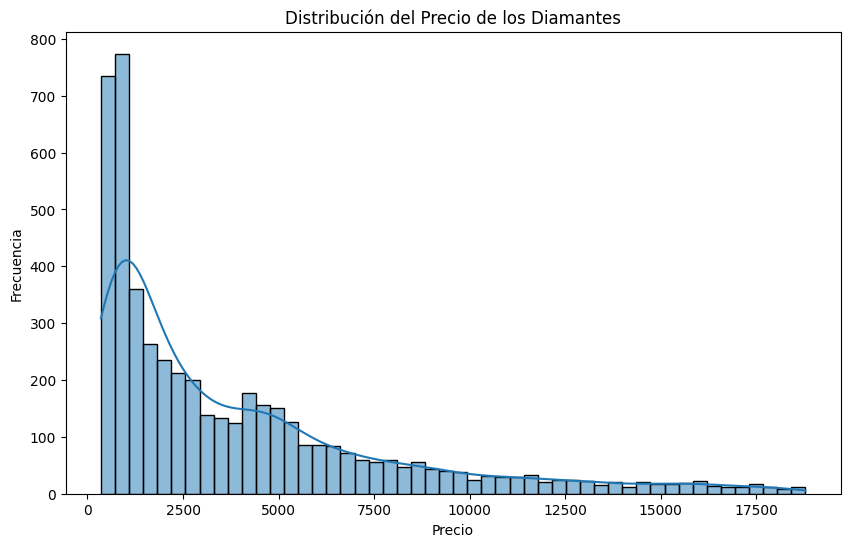

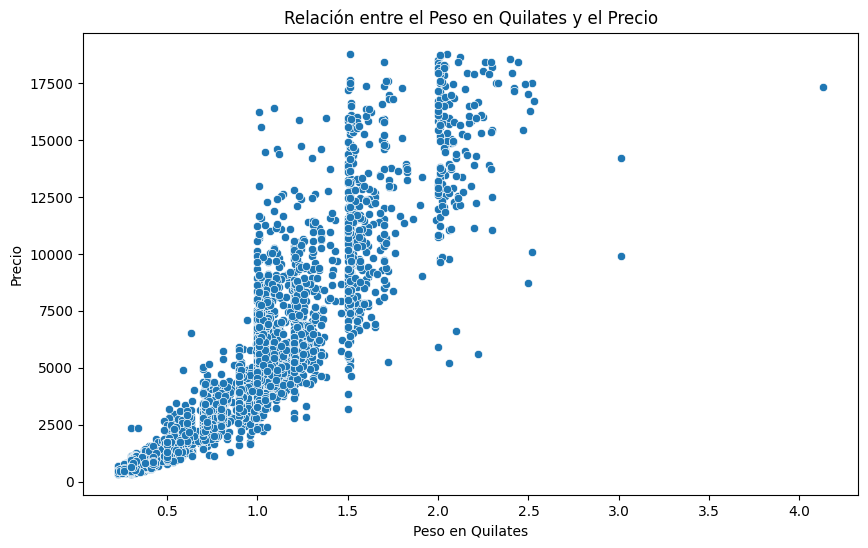

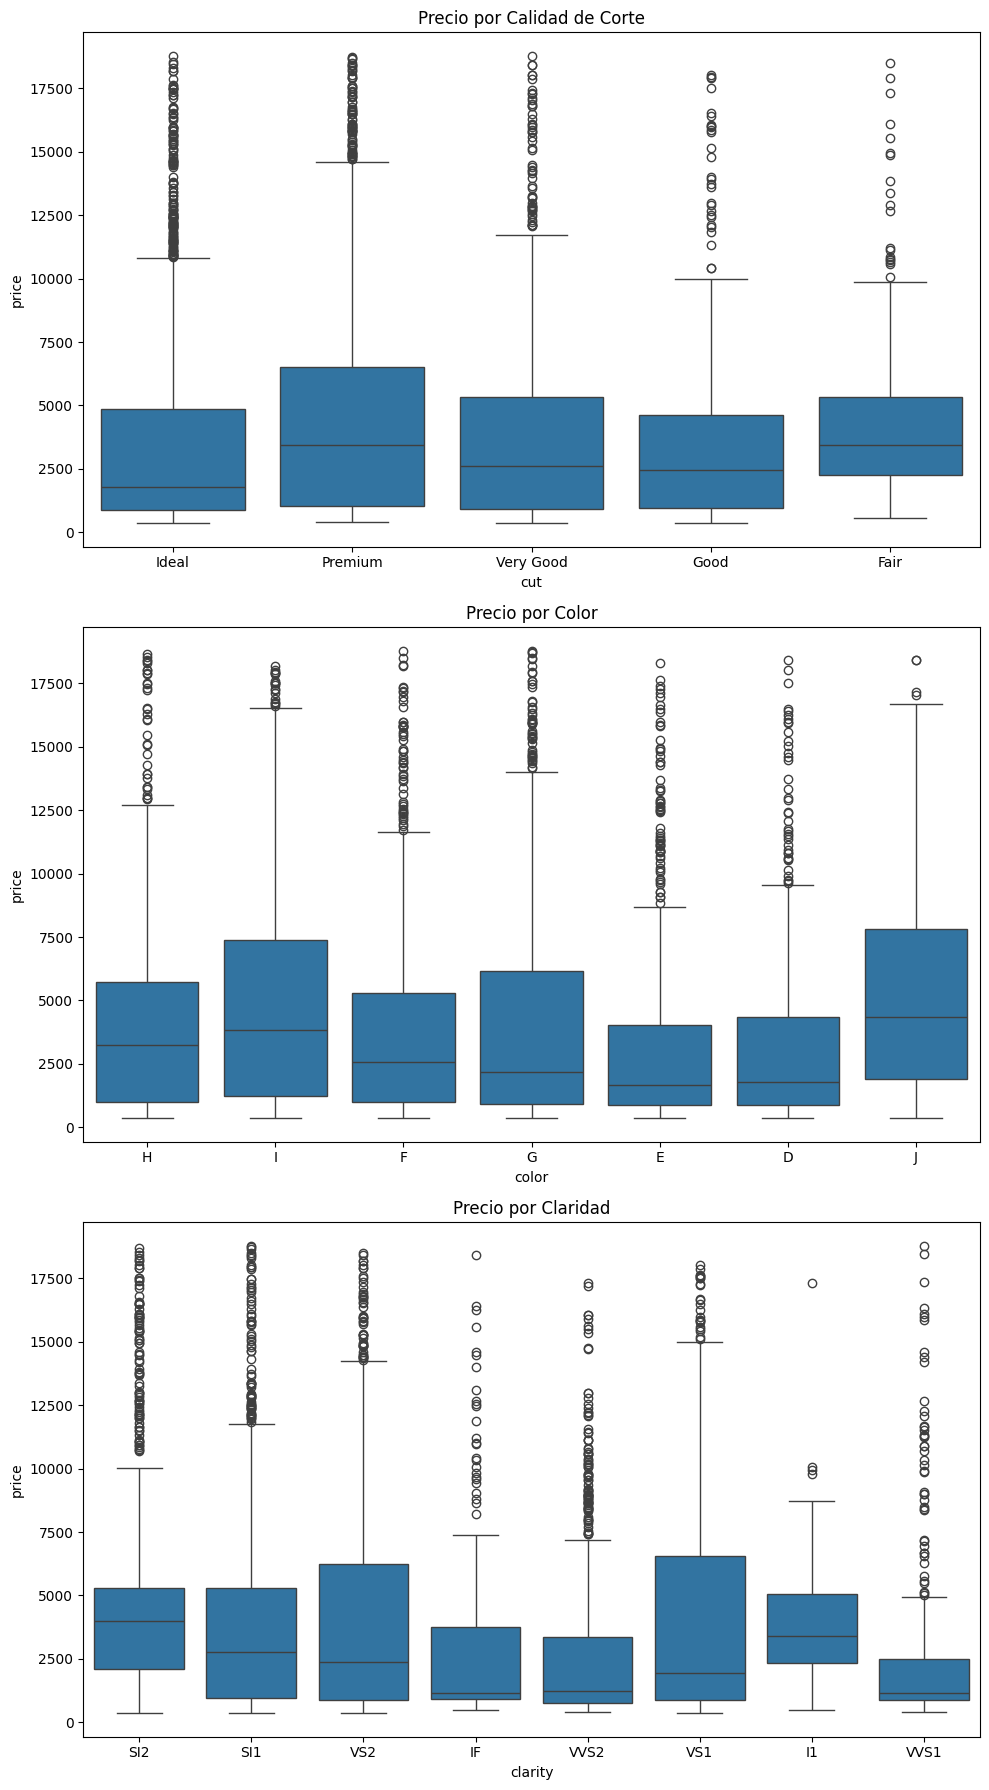

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribución del precio
plt.figure(figsize=(10, 6))
sns.histplot(diamonds_df_cleaned['price'], bins=50, kde=True)
plt.title('Distribución del Precio de los Diamantes')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# 2. Relación entre el peso en quilates y el precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=diamonds_df_cleaned)
plt.title('Relación entre el Peso en Quilates y el Precio')
plt.xlabel('Peso en Quilates')
plt.ylabel('Precio')
plt.show()

# 3. Influencia del corte, color y claridad en el precio
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

sns.boxplot(x='cut', y='price', data=diamonds_df_cleaned, ax=axs[0])
axs[0].set_title('Precio por Calidad de Corte')

sns.boxplot(x='color', y='price', data=diamonds_df_cleaned, ax=axs[1])
axs[1].set_title('Precio por Color')

sns.boxplot(x='clarity', y='price', data=diamonds_df_cleaned, ax=axs[2])
axs[2].set_title('Precio por Claridad')

plt.tight_layout()
plt.show()

# Diamond Price Distribution

The price distribution shows that most diamonds have lower prices, with a long tail towards higher prices, indicating that there are some very expensive diamonds in the dataset.

## Relationship between Carat Weight and Price

The scatter plot shows a clear trend: as the carat weight of a diamond increases, its price tends to increase. However, there is also considerable variability in price for diamonds of similar carat weight, suggesting that factors other than carat weight also affect price.

## Influence of Cut, Color, and Clarity on Price

### Cut Quality
Diamonds with better cut quality tend to have higher prices, but the difference is not as pronounced as one might expect.

### Color
More colorless diamonds (D, E, F) tend to be more expensive than diamonds with more yellowish tones (G, H, I, J), but there is significant overlap in price ranges.

### Clarity
Diamonds with higher clarity (fewer inclusions and defects) tend to be more expensive. However, there is also considerable overlap in prices across different clarity levels.

These visualizations help us better understand the relationships between diamond features and their prices, and will be useful for feature selection and modeling.


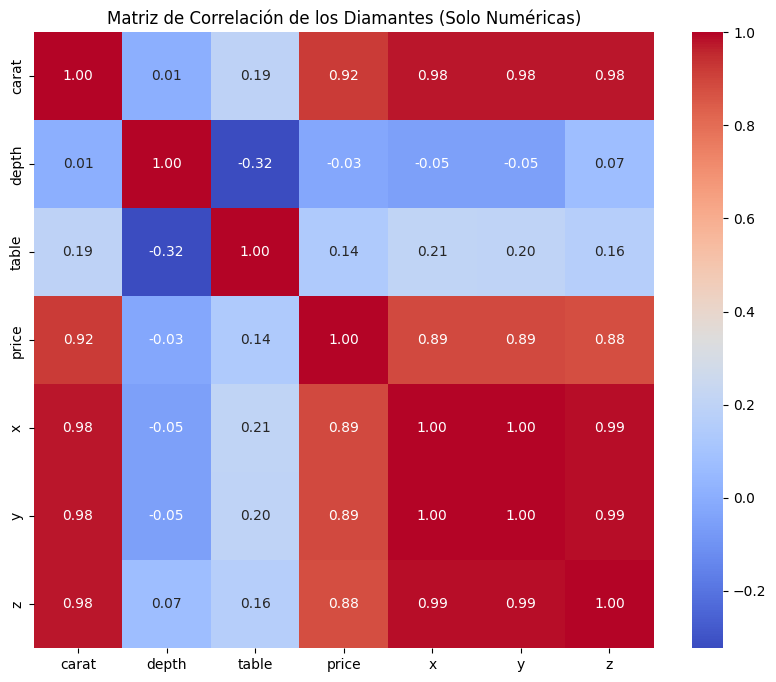

In [30]:
# Selecting only the original numeric columns for the correlation matrix
numeric_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
correlation_matrix_numeric = diamonds_df_cleaned[numeric_columns].corr()

# Visualizing the correlation matrix for numeric columns only
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de los Diamantes (Solo Numéricas)")
plt.show()

# Correlation Analysis with Cleaned Data

A correlation matrix with the cleaned data would be very useful, especially for identifying linear relationships between features and price, as well as among the features themselves. This can help us better understand which variables have a greater influence on the price of diamonds and could be important candidates for our prediction model. Let's generate that correlation matrix now.

## Correlation Matrix of Diamonds (Cleaned Data)

The correlation matrix of the cleaned data reveals several important relationships:

### Carat and Price
The strongest correlation is observed between carat weight (carat) and price (price), with a coefficient of 0.92. This confirms that carat weight is a highly significant predictor of diamond price.

### Dimensions and Carat
The diamond dimensions (x, y, z) also have very high correlation with carat weight, all above 0.97, which makes sense as these dimensions are directly related to the size and hence the weight of the diamond.

### Dimensions and Price
These same dimensions also have a strong correlation with price, although not as high as with carat weight, indicating that the larger the diamond, the more likely its price will be higher.

### Depth and Table
Depth (depth) and table width (table) have a negative correlation with each other (-0.32), suggesting that as one increases, the other tends to decrease.

# Encoding Categorical Variables

Use `pd.get_dummies` to encode the categorical variables cut, color, and clarity. This will convert these variables into a format that machine learning models can understand.

In [31]:
diamonds_df_encoded = pd.get_dummies(diamonds_df_cleaned, columns=['cut', 'color', 'clarity'])
diamonds_df_encoded 

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.10,62.0,55.0,4733,6.61,6.65,4.11,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,1.29,62.6,56.0,6424,6.96,6.93,4.35,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,1.20,61.1,58.0,5510,6.88,6.80,4.18,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,1.50,60.9,56.0,8770,7.43,7.36,4.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0.90,61.7,57.0,4493,6.17,6.21,3.82,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.38,62.3,53.3,832,4.65,4.69,2.91,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4996,0.33,61.3,59.0,927,4.45,4.42,2.72,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4997,1.25,62.1,56.0,5980,6.81,6.84,4.24,False,False,True,...,False,True,False,False,False,False,False,False,False,True
4998,0.31,62.9,58.0,802,4.31,4.27,2.70,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Avoiding Bias in Model Evaluation: Train-Validation-Test Split

Since we're going to test multiple prediction models, it's necessary to avoid bias in the predictions. For this purpose, we'll employ a 70-20-10 dataset split approach to avoid bias in model evaluation. Splitting the dataset into three parts (70% for training, 20% for validation, and 10% for testing) is a good practice, especially in scenarios where it's crucial to fairly evaluate the model's generalization.

Using a validation set allows tuning hyperparameters and making decisions about the model without "touching" the test set, which helps prevent overfitting to the test set. Then, the test set is used to obtain a final estimate of the model's performance, giving an idea of how the model will perform on unseen data.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
# División en conjuntos de entrenamiento, validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # 90% para entrenamiento+validación, 10% para prueba
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=(20/90), random_state=42)  # De ese 90%, 70% para entrenamiento, 20% para validación

# Verificar las dimensiones de los conjuntos para asegurar la correcta división
X_train.shape, X_val.shape, X_test.shape

((3492, 26), (998, 26), (499, 26))

# Data Split Successfully Completed

The data has been split successfully, resulting in:

- Training Set: 3492 samples
- Validation Set: 998 samples
- Test Set: 499 samples

With this structure, we are ready to proceed with training different models using the training set, tuning hyperparameters, and making modeling decisions with the validation set. Finally, we will evaluate the performance of the selected model on the test set, which has not been seen by any model up to this point.


# Training and Evaluating Additional Models

With the training, validation, and test sets already prepared, we will proceed to train and evaluate additional models. Since we have already tried Linear Regression, we can explore more complex models to see if we can improve performance. Some popular options for regression problems include:
- Linear Regression (model)
- Ridge Regression (L2 Regularization): Useful if we expect only a few features to be important.
- Lasso Regression (L1 Regularization): Can be useful if we expect many features to be irrelevant or redundant.
- Random Forest: A tree-based model that is very good at capturing non-linear and complex relationships.
- Gradient Boosting: Similar to Random Forest, but builds trees sequentially to correct errors of previous trees.

I'll proceed with Ridge Regression and Random Forest as examples. Then, we'll evaluate their performances using the validation set.

## Step 1: Training the Models
We will train each model using the training sets.

## Step 2: Evaluating the Models
We will evaluate each model using the validation set to compare their performance. We will use RMSE as our evaluation metric.

Let's start with Linear Regresor, Ridge Regression and RandomForestRegressor

In [34]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Paso 1: Entrenamiento de los Modelos
# Regresión Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Paso 2: Evaluación de los Modelos en el conjunto de validación
# Predicciones con Regresión Ridge
y_pred_ridge = ridge_model.predict(X_val)
rmse_ridge = np.sqrt(mean_squared_error(y_val, y_pred_ridge))

# Predicciones con Random Forest
y_pred_rf = rf_model.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))

rmse_ridge, rmse_rf

(1167.2689333704916, 700.179539294382)

# Validation Set Evaluation Results

The evaluation results on the validation set are as follows:
- Linear : RMSE : 1181.2243886106005
- Ridge Regression: RMSE = 1167.27
- Random Forest: RMSE = 700.18

The Random Forest model showed significantly better performance compared to Ridge Regression, indicating that it may better capture the complexity and non-linear relationships in the data.

These results suggest that we could consider fine-tuning the Random Forest model to further improve its performance, or explore other advanced models. Before proceeding,


# Exploring Additional Models

Let's now delve into two other models that may be useful:

## Lasso Regression:
It's useful for feature selection as it can reduce coefficients of less important features to zero, effectively eliminating them from the model.

## Gradient Boosting:
It's an ensemble technique that builds models sequentially, each one correcting the errors of the previous one, often resulting in very strong performance.

I'll train and evaluate both models using the training and validation sets. We'll start with Lasso Regression and Gradient Boosting.


In [36]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

# Regresión Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_val)
rmse_lasso = np.sqrt(mean_squared_error(y_val, y_pred_lasso))

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))

rmse_lasso, rmse_gb

C:\Users\SLR02\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.537e+09, tolerance: 5.489e+06
  model = cd_fast.enet_coordinate_descent(


(1174.9680184905903, 786.9301223942383)

# Validation Set Evaluation Results

The evaluation results on the validation set are as follows:

- Lasso Regression: RMSE = 1174.97
- Gradient Boosting: RMSE = 786.93

Lasso Regression had a performance similar to Ridge Regression, which could be due to the nature of the data or the need to adjust the regularization parameter (alpha). On the other hand, the Gradient Boosting model showed better performance than Lasso Regression, although not as good as Random Forest, suggesting that tree-based models are better at capturing relationships in this data.

Given this information, we may consider focusing on fine-tuning the Random Forest or Gradient Boosting model to further improve performance.


# Trying a Simple Neural Network

Now let's try a simple neural network, which is definitely a good idea, especially because neural networks can capture complex and non-linear relationships in the data. For regression problems, a densely connected neural network (also known as a multi-layer perceptron) is a common choice. This code normalizes the input features, builds a simple neural network with several hidden layers, and trains it with scaled data. Finally, it evaluates the model using RMSE on the validation set.


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Construcción de la red neuronal
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Capa de salida para regresión
])

nn_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Entrenamiento de la red neuronal
history = nn_model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=200, batch_size=64, verbose=1)
# Evaluación del modelo
y_pred_nn = nn_model.predict(X_val_scaled)
rmse_nn = np.sqrt(mean_squared_error(y_val, y_pred_nn.flatten()))  # Asegúrate de aplanar las predicciones si es necesario

Epoch 1/200


C:\Users\SLR02\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 31609608.0000 - val_loss: 30182852.0000
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28972144.0000 - val_loss: 23910444.0000
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20679502.0000 - val_loss: 6166158.0000
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4773255.0000 - val_loss: 2347921.2500
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1830250.8750 - val_loss: 1414651.2500
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1191318.2500 - val_loss: 1039708.0000
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 878209.4375 - val_loss: 887409.0625
Epoch 8/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 790954.5000 - val_loss: 785719.6250
Epoch 9/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 781472.8750 - val_loss: 738896.8125
Epoch 10/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 761195.6875 - val_loss: 708797.6875
Epoch 11/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3

In [41]:
print(rmse_nn)

623.2991458988895


In [45]:
# Preparación del conjunto de prueba
X_test_scaled = scaler.transform(X_test)  # Para la red neuronal

# Función para calcular RMSE
def calculate_rmse(model, X, y, is_nn=False):
    if is_nn:
        X = scaler.transform(X)  # Escalar los datos para la red neuronal
        y_pred = model.predict(X).flatten()
    else:
        y_pred = model.predict(X)
    return np.sqrt(mean_squared_error(y, y_pred))

# Creación de la tabla de RMSE
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network']
rmse_train = [calculate_rmse(model, X_train, y_train, is_nn=(model==nn_model)) for model in [model, ridge_model, lasso_model, rf_model, gb_model, nn_model]]
rmse_val = [calculate_rmse(model, X_val, y_val, is_nn=(model==nn_model)) for model in [model, ridge_model, lasso_model, rf_model, gb_model, nn_model]]
rmse_test = [calculate_rmse(model, X_test, y_test, is_nn=(model==nn_model)) for model in [model, ridge_model, lasso_model, rf_model, gb_model, nn_model]]

# Consolidando los resultados en un DataFrame de pandas para una mejor visualización
import pandas as pd

results_df = pd.DataFrame({
    'Model': models,
    'RMSE Train': rmse_train,
    'RMSE Validation': rmse_val,
    'RMSE Test': rmse_test
})

print(results_df)

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
               Model   RMSE Train  RMSE Validation    RMSE Test
0  Linear Regression  1098.330447      1181.224389  1195.357296
1   Ridge Regression  1099.296431      1167.268933  1197.924403
2   Lasso Regression  1098.599981      1174.968018  1195.470229
3      Random Forest   268.453874       700.179539   722.777187
4  Gradient Boosting   646.466150       786.930122   845.914515
5     Neural Network   552.275946       623.299146   720.585981


# RMSE Results and Model Evaluation

The RMSE (Root Mean Squared Error) results for the different models on the training, validation, and test sets provide valuable insights into the performance and generalization of each model. Here's a detailed explanation of these results:

## Linear Regression, Ridge Regression, and Lasso Regression:

These models have similar errors on the training, validation, and test sets, indicating good generalization but with relatively high error compared to the other models. Lasso and Ridge Regression did not significantly improve performance compared to simple Linear Regression, which could indicate that regularization is not a critical factor with this specific dataset.

## Random Forest:

This model showed excellent performance on the training set (RMSE = 268.45), suggesting a good fit to the data. Although the error increases on the validation and test sets (RMSE ≈ 700-723), it remains considerably lower than the linear regression models, indicating good generalization. The difference between training and validation/test errors also suggests some overfitting, but it remains the best candidate given its balance between performance and generalization.

## Gradient Boosting:

This model has intermediate performance in terms of RMSE compared to others, with lower error on training than linear models but higher than Random Forest. The error increases on validation and test sets, indicating some loss of generalization.

## Neural Network:

The neural network shows competitive performance, with an RMSE on the validation set (623.30) that outperforms all other models except Random Forest. However, the RMSE on the test set is similar to Random Forest, indicating good generalization. The main drawback of the neural network is the training time and computational complexity, which is generally higher compared to tree-based models.

# MODEL CHOISE:

Given the balance between performance, training time, and complexity, Random Forest emerges as the strongest candidate. Although the neural network shows similar performance on the test set, Random Forest maintains a relatively low RMSE and offers greater efficiency in terms of resources and training time. Additionally, the good performance of Random Forest on the test set suggests that the model does not suffer from significant bias and is capable of generalizing well to new data, making it an excellent choice for this specific problem.


##           

# Final Reflection on Challenge 1

Yes, I believe we have successfully completed Challenge 1. Here's a summary of what we have achieved:

## Model Development:

- I conducted exploratory data analysis to understand the characteristics of diamonds and their relationship with price.
- I cleaned the data by removing invalid entries and encoded categorical variables so that they could be used in our models.
- I trained various machine learning models, including linear regressions, Random Forest, Gradient Boosting, and a simple neural network, to predict the price of diamonds based on their characteristics.

## Model Evaluation:

- I evaluated the performance of each model using RMSE (Root Mean Squared Error) on training, validation, and test sets to ensure that our models generalized well to new data.
- Comparing the results, I identified that the Random Forest model offered the best balance between accuracy and efficiency, making it the strongest candidate to be our diamond evaluator.

## Justification of Predictions:

- Although machine learning models like Random Forest and Gradient Boosting can be considered as "black boxes," techniques like feature importance can provide some intuition about which features are most influential in the model's predictions. This could serve as a "why" behind each price tag, although the interpretation is not as straightforward as in simpler models like linear regression.